### Problem Statement : Forcast Vistors coming to Restaurant depending on past Data  with Consideration of Holidays

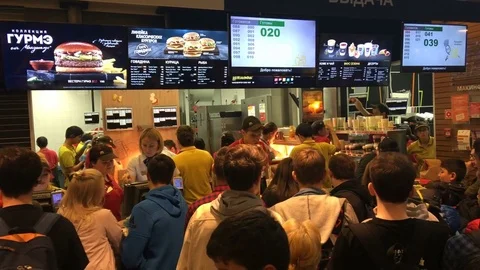

In [1]:
import pyforest

In [2]:
rv=pd.read_csv(r'C:\Users\AKSHAY\Downloads\RestaurantVisitors.csv', index_col= 'date',parse_dates=True)
rv.head()
rv1=rv.copy()
# Here Dates in index

rv.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [4]:
rv.isna().sum()

weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64

In [5]:
rv.shape

(478, 8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

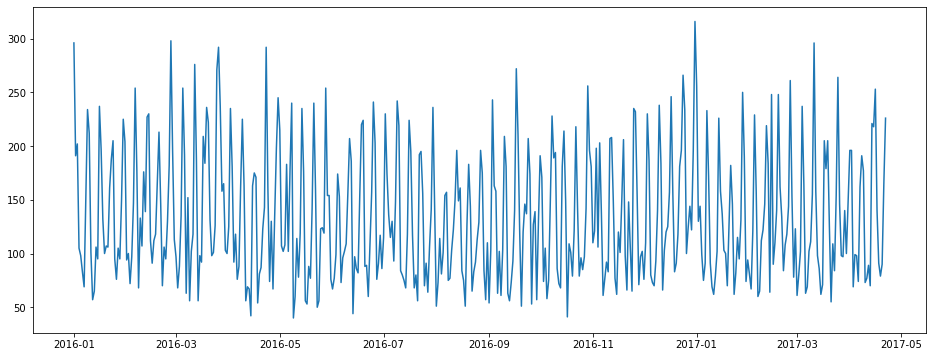

In [6]:
plt.figure(figsize=(16,6))
plt.plot(rv.total)
plt.show()

In [7]:
rv[rv['holiday']==1].index
# to get index positions of Holidays
# As we are building model we must know when there are hoildays

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [8]:
len(rv[rv['holiday']==1].index)

32

In [9]:
index_pos = rv[rv['holiday']==1].index

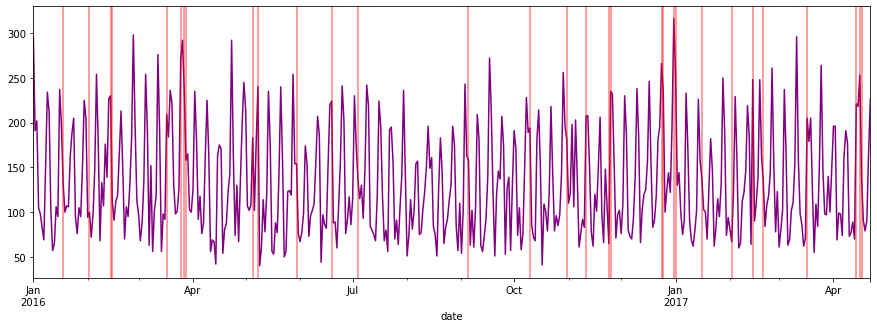

In [10]:
ax = rv['total'].plot(figsize=(15,5),color='purple')
for day in index_pos :
    ax.axvline(x = day, color = 'r', alpha= 0.5)

# Axvline is just to put VERTICAL line 

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [12]:
train_rv = rv.iloc[:450]
test_rv = rv.iloc[450:]

In [13]:
import pmdarima
from pmdarima import auto_arima

In [ ]:
auto_arima(rv['total'],seasonal=True,m=7)

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
model1= SARIMAX(train_rv['total'], order=(0, 0, 0),seasonal_order=(1, 0, 1, 7))

D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [16]:
results=model1.fit()

In [17]:
pred_rv=results.predict(start=450,end=477)
pred_rv

2017-03-26    174.190864
2017-03-27     90.608737
2017-03-28     95.759552
2017-03-29     95.480050
2017-03-30     96.689025
2017-03-31    145.286002
2017-04-01    232.774350
2017-04-02    174.179915
2017-04-03     90.603042
2017-04-04     95.753533
2017-04-05     95.474049
2017-04-06     96.682948
2017-04-07    145.276870
2017-04-08    232.759718
2017-04-09    174.168966
2017-04-10     90.597347
2017-04-11     95.747514
2017-04-12     95.468047
2017-04-13     96.676870
2017-04-14    145.267738
2017-04-15    232.745087
2017-04-16    174.158018
2017-04-17     90.591652
2017-04-18     95.741495
2017-04-19     95.462047
2017-04-20     96.670793
2017-04-21    145.258607
2017-04-22    232.730457
Freq: D, Name: predicted_mean, dtype: float64

In [18]:
print('Len Test',len(test_rv), ' & Len of Pred',len(pred_rv))

Len Test 28  & Len of Pred 28


In [19]:
li=test_rv[test_rv['holiday']==1].index   # Only holidays in Test Data
li

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

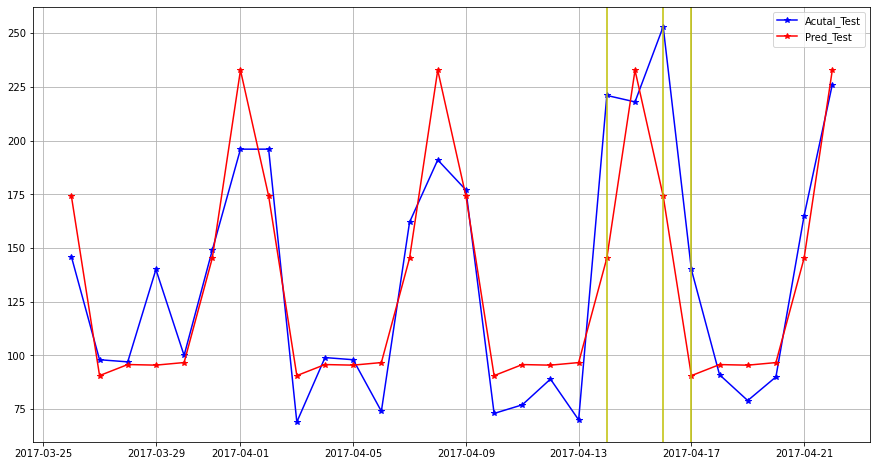

In [20]:
plt.figure(figsize=(15,8))
plt.plot(test_rv.total , marker="*",color='blue', label= "Acutal_Test")
plt.plot(pred_rv,    marker="*",color='r', label= "Pred_Test")
plt.legend()
plt.grid()
plt.axvline(x= '2017-04-14',color='y')
plt.axvline(x= '2017-04-16',color='y')
plt.axvline(x= '2017-04-17',color='y')
plt.show()

## Look at Graph it is now Predicting correctly since in Holidays Pred< Act
##### Becuse we did not yet used X in SARIMA-X

In [21]:
error=pred_rv-test_rv.total
print("Mean Square Error :",np.mean(np.square(error)))
print("Root Mean Square Error :",np.sqrt(np.mean(np.square(error))))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Square Error : 875.4817753102388


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Square Error : 29.588541283920012


# SARIMA-X
* Till this point we used sarima only
1. till point we used Auto-Arima values in SarimaX

In [22]:
auto_arima(rv['total'],seasonal=True, m=7 , exogenous= rv[['holiday']] )

# Values in exogenous it must be in DATAFRAME

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [23]:
model_SARIMAX= SARIMAX(train_rv['total'],
                       order=(1, 0, 0),
                       seasonal_order=(1, 0, 1, 7),
                       exog= train_rv[['holiday']] )

D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [24]:
result=model_SARIMAX.fit()

In [25]:
pred_rv_exog=result.predict(start=450 , end= 477 ,exog =test_rv[['holiday']])
pred_rv_exog

2017-03-26    176.358277
2017-03-27     81.860489
2017-03-28     93.016639
2017-03-29     95.450841
2017-03-30     92.489609
2017-03-31    138.966727
2017-04-01    228.765143
2017-04-02    169.414730
2017-04-03     80.490850
2017-04-04     92.742556
2017-04-05     95.392415
2017-04-06     92.473837
2017-04-07    138.956625
2017-04-08    228.751485
2017-04-09    169.404835
2017-04-10     80.486171
2017-04-11     92.737180
2017-04-12     95.386888
2017-04-13     92.468479
2017-04-14    207.890459
2017-04-15    228.738232
2017-04-16    238.336904
2017-04-17    149.423392
2017-04-18     92.731806
2017-04-19     95.381361
2017-04-20     92.463121
2017-04-21    138.940524
2017-04-22    228.724979
Freq: D, Name: predicted_mean, dtype: float64

In [26]:
error=pred_rv_exog-test_rv.total
print("Mean Square Error :",np.mean(np.square(error)))
print("Root Mean Square Error :",np.sqrt(np.mean(np.square(error))))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Square Error : 359.1922405246633


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Square Error : 18.952367675957095


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

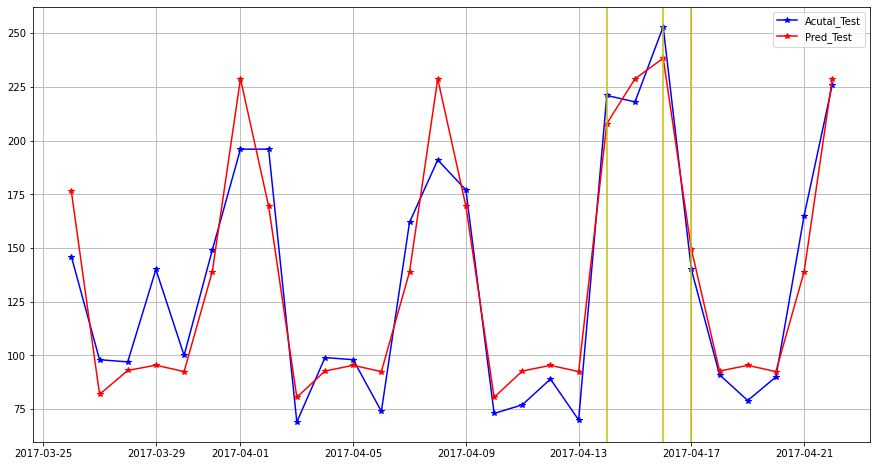

In [27]:
plt.figure(figsize=(15,8))
plt.plot(test_rv.total , marker="*",color='blue', label= "Acutal_Test")
plt.plot(pred_rv_exog,    marker="*",color='r', label= "Pred_Test")
plt.legend()
plt.grid()
plt.axvline(x= '2017-04-14',color='y')
plt.axvline(x= '2017-04-16',color='y')
plt.axvline(x= '2017-04-17',color='y')
plt.show()

In [28]:
(29-18.95)/29

0.34655172413793106

In [29]:
rv.shape

(478, 8)

In [30]:
rv1.shape

(517, 8)

In [31]:
rv1.shape[0]-rv.shape[0]

39

In [32]:
result.predict(start=475 , end=477 ,exog =test_rv[['holiday']])

2017-04-20     92.463121
2017-04-21    138.940524
2017-04-22    228.724979
Freq: D, Name: predicted_mean, dtype: float64

In [33]:
test_rv.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [34]:
517-68

449

In [35]:
test_rv_2=rv1.iloc[449:517]
test_rv_2.head()
# congratuation Ak you have to Test at 68 records but we want 

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-03-25,Saturday,0,na,95.0,43.0,62.0,64.0,264.0
2017-03-26,Sunday,0,na,33.0,27.0,48.0,38.0,146.0
2017-03-27,Monday,0,na,26.0,31.0,34.0,7.0,98.0
2017-03-28,Tuesday,0,na,21.0,25.0,20.0,31.0,97.0
2017-03-29,Wednesday,0,na,39.0,40.0,22.0,39.0,140.0


In [36]:
rv1.shape

(517, 8)

In [37]:
res=result.predict(start=449 , end=517 ,exog =test_rv_2[['holiday']])
res.shape

(69,)

In [38]:
res.head(40)

2017-03-25    230.240964
2017-03-26    176.358277
2017-03-27     81.860489
2017-03-28     93.016639
2017-03-29     95.450841
2017-03-30     92.489609
2017-03-31    138.966727
2017-04-01    228.765143
2017-04-02    169.414730
2017-04-03     80.490850
2017-04-04     92.742556
2017-04-05     95.392415
2017-04-06     92.473837
2017-04-07    138.956625
2017-04-08    228.751485
2017-04-09    169.404835
2017-04-10     80.486171
2017-04-11     92.737180
2017-04-12     95.386888
2017-04-13     92.468479
2017-04-14    138.948574
2017-04-15    297.680116
2017-04-16    169.395019
2017-04-17    149.423392
2017-04-18    161.673691
2017-04-19     95.381361
2017-04-20     92.463121
2017-04-21    138.940524
2017-04-22    228.724979
2017-04-23    169.385205
2017-04-24     80.476844
2017-04-25     92.726434
2017-04-26     95.375835
2017-04-27     92.457764
2017-04-28    138.932473
2017-04-29    228.711726
2017-04-30    169.375391
2017-05-01     80.472181
2017-05-02     92.721061
2017-05-03     95.370309


In [39]:
rv.tail(20)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-03,Monday,0,na,24.0,2.0,29.0,14.0,69.0
2017-04-04,Tuesday,0,na,45.0,8.0,22.0,24.0,99.0
2017-04-05,Wednesday,0,na,44.0,15.0,20.0,19.0,98.0
2017-04-06,Thursday,0,na,22.0,11.0,19.0,22.0,74.0
2017-04-07,Friday,0,na,55.0,42.0,40.0,25.0,162.0
2017-04-08,Saturday,0,na,71.0,24.0,47.0,49.0,191.0
2017-04-09,Sunday,0,na,54.0,31.0,33.0,59.0,177.0
2017-04-10,Monday,0,na,21.0,9.0,17.0,26.0,73.0
2017-04-11,Tuesday,0,na,23.0,22.0,17.0,15.0,77.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

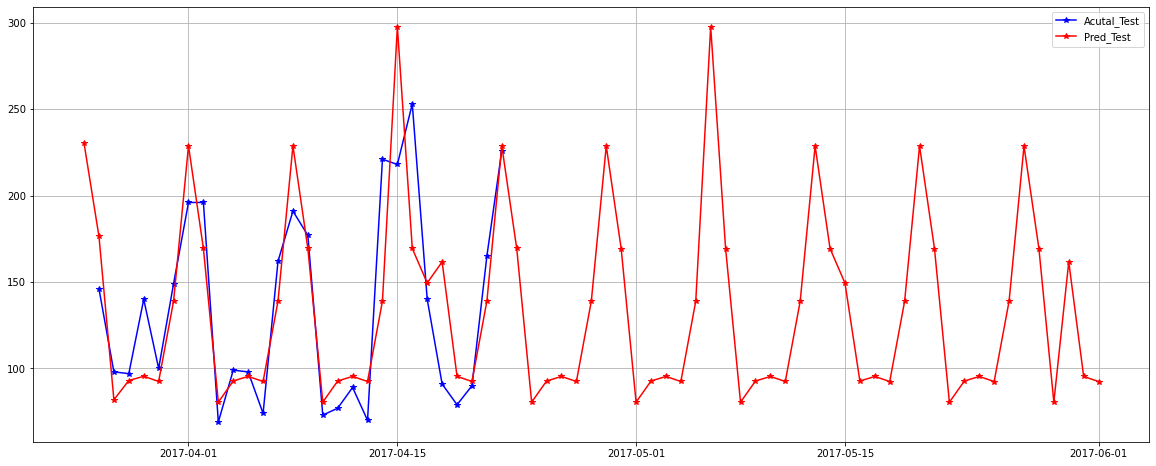

In [40]:
plt.figure(figsize=(20,8))
plt.plot(test_rv.total , marker="*",color='blue', label= "Acutal_Test")
plt.plot(res,    marker="*",color='r', label= "Pred_Test")
plt.legend()
plt.grid()

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

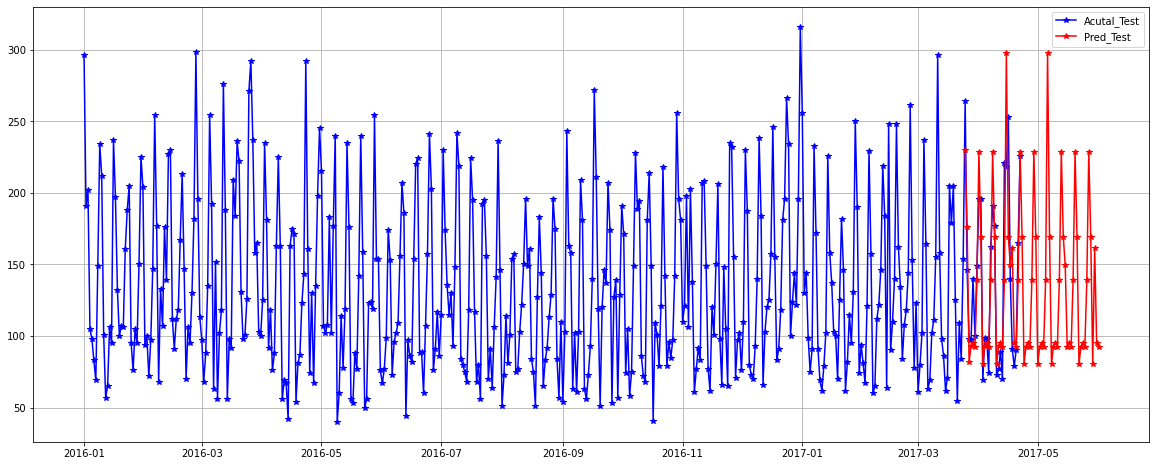

In [41]:
plt.figure(figsize=(20,8))
plt.plot(rv.total , marker="*",color='blue', label= "Acutal_Test")
plt.plot(res,    marker="*",color='r', label= "Pred_Test")
plt.legend()
plt.grid()

plt.show()